/kaggle/input/crab-age-prediction/CrabAgePrediction.csv


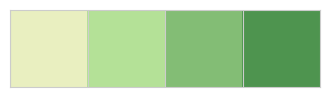

In [255]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
colors_nude = ['#E9EFC0','#B4E197','#83BD75','#4E944F']
sns.palplot(sns.color_palette(colors_nude))

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [256]:
df = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')

In [257]:
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [259]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [260]:
df.drop_duplicates()
df.shape

(3893, 9)

In [261]:
numerical_columns = [col for col in df if df[col].dtype != 'object']

In [262]:
print(numerical_columns)

['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


In [263]:
df.loc[df['Height'] > 1]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
748,M,1.7625,1.4125,1.2875,62.652395,31.397071,13.792032,14.514944,10
2256,F,1.1375,0.8875,2.8250,16.839603,9.412034,3.288542,3.784658,8


In [264]:
df.loc[df['Height'] > 1]

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
748,M,1.7625,1.4125,1.2875,62.652395,31.397071,13.792032,14.514944,10
2256,F,1.1375,0.8875,2.8250,16.839603,9.412034,3.288542,3.784658,8


In [265]:
df = df.drop(df.loc[df['Height'] > 1].index)

In [266]:
from scipy.stats import skew

In [267]:
skewed_col = df[numerical_columns].apply(lambda x: skew(x)).sort_values(ascending=False)

In [268]:
skewed_col

Age               1.103758
Shucked Weight    0.698342
Shell Weight      0.607466
Viscera Weight    0.575894
Weight            0.516290
Height           -0.286986
Diameter         -0.617835
Length           -0.651452
dtype: float64

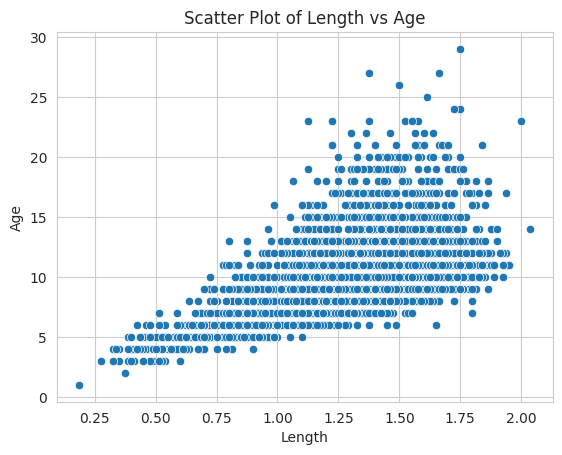

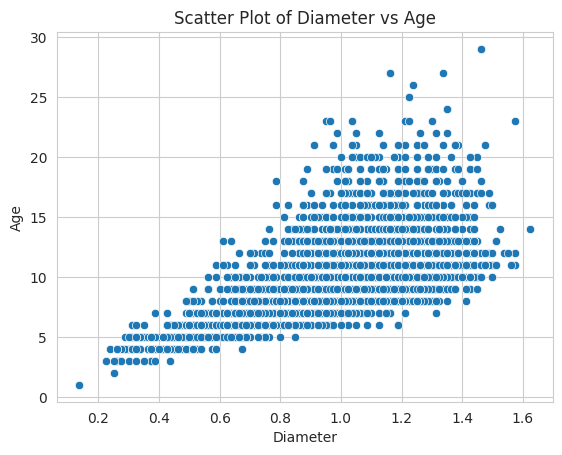

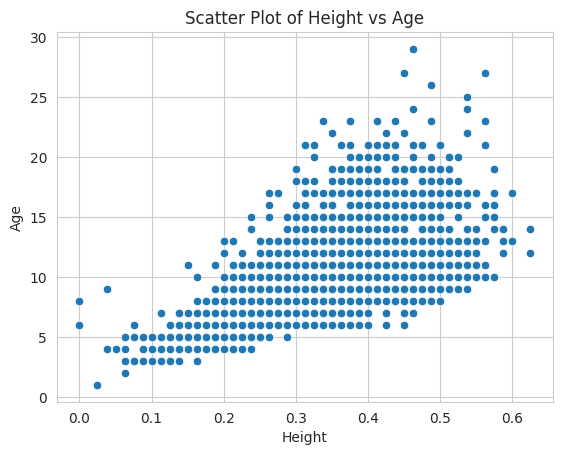

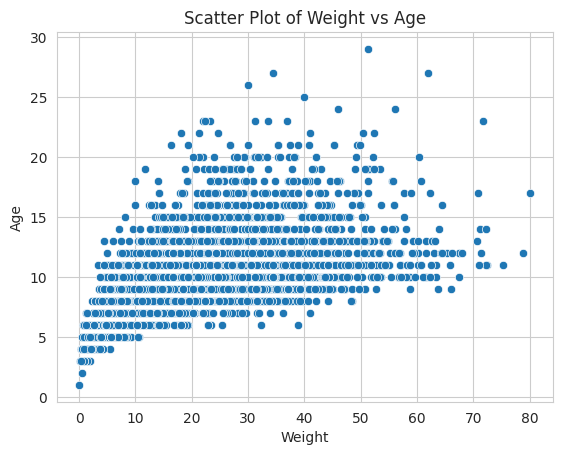

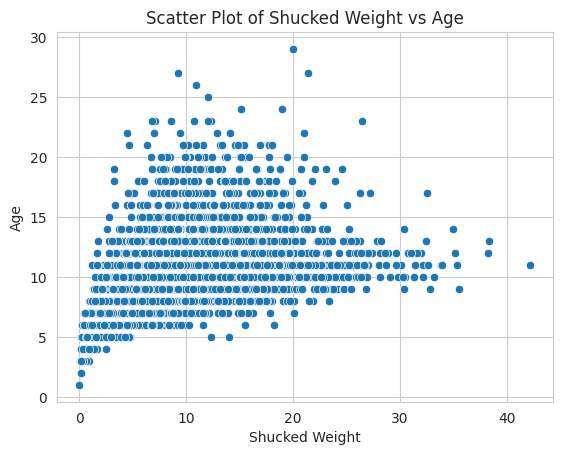

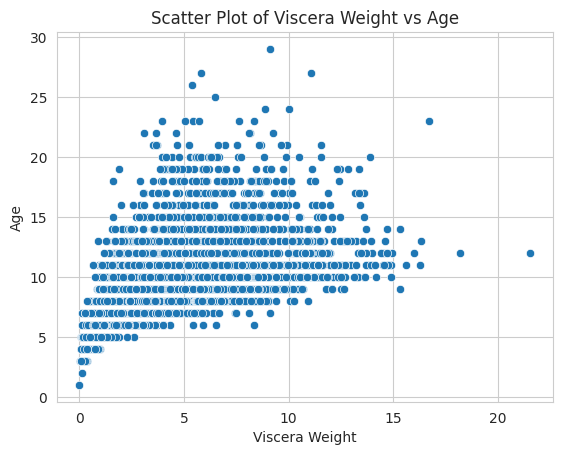

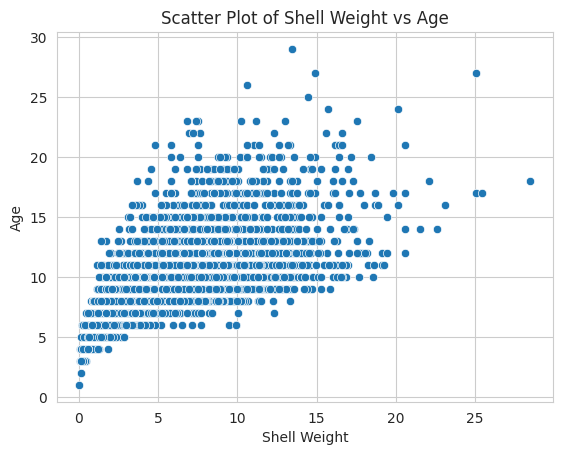

In [269]:
for column in numerical_columns[:-1]:
    sns.scatterplot(x=column, y='Age', data=df)
    plt.title(f'Scatter Plot of {column} vs Age')
    plt.xlabel(column)
    plt.ylabel('Age')
    plt.show()

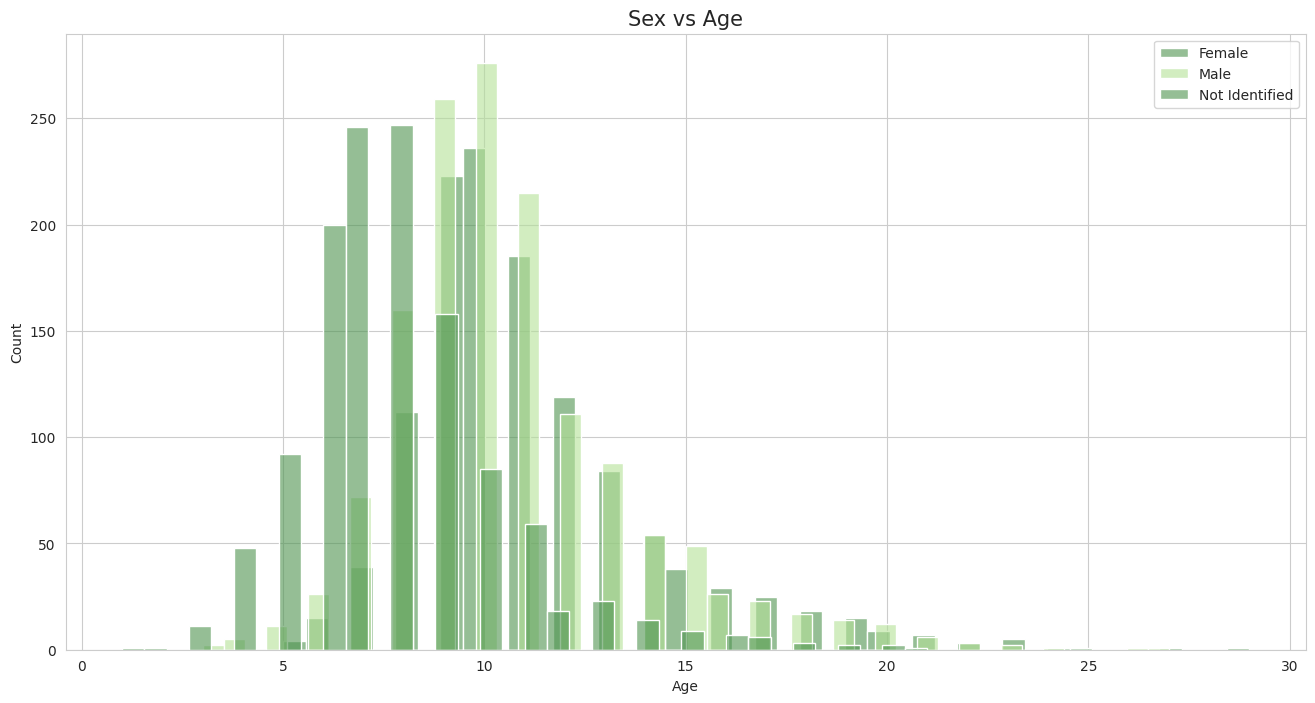

In [270]:
fig, ax = plt.subplots(figsize=(16,8))
sns.histplot(data = df[df['Sex'] == 'F'], x = 'Age', color = colors_nude[-1], label = 'Female', alpha = 0.6)
sns.histplot(data = df[df['Sex'] == 'M'], x = 'Age', color = colors_nude[1], label = 'Male', alpha = 0.6)
sns.histplot(data = df[df['Sex'] == 'I'], x = 'Age', color = colors_nude[3], label = 'Not Identified', alpha = 0.6)
plt.title('Sex vs Age', size = 15)
plt.legend()
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

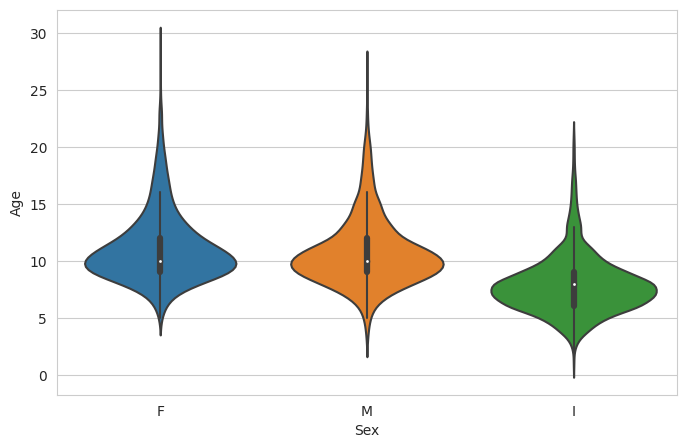

In [271]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', data=df)

In [272]:
from scipy.stats import norm

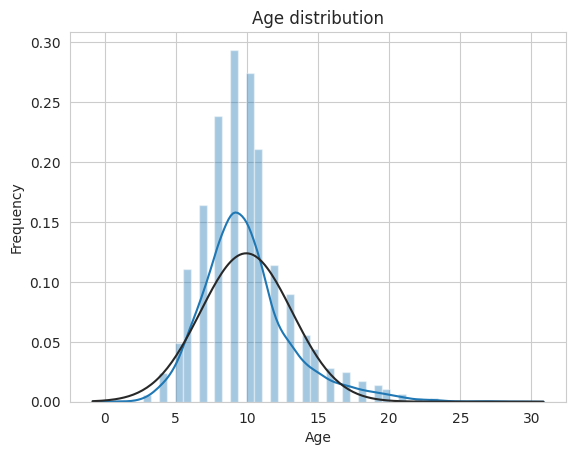

<Figure size 640x480 with 0 Axes>

In [273]:
sns.distplot(df['Age'], fit=norm);
plt.ylabel('Frequency')
plt.title('Age distribution')
fig = plt.figure()
plt.show()

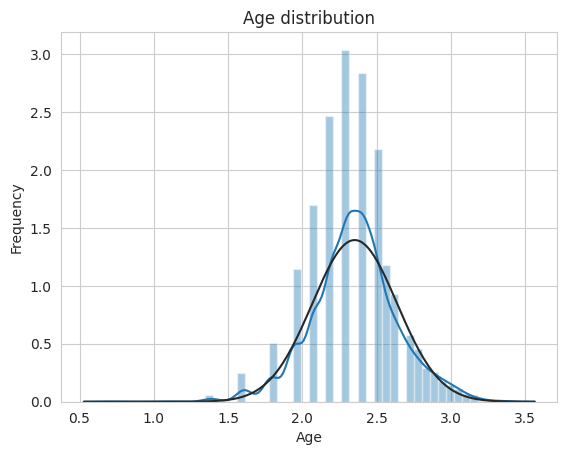

<Figure size 640x480 with 0 Axes>

In [274]:
df['Age'] = np.log1p(df['Age'])
sns.distplot(df['Age'], fit=norm)
plt.ylabel('Frequency')
plt.title('Age distribution')
fig = plt.figure()
plt.show()

In [275]:
df['Weight'] = df['Weight'] + df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight']

In [276]:
df = df.drop(columns=['Shell Weight','Shucked Weight','Diameter','Viscera Weight'], axis=1)

In [336]:
numerical_columns = X_train.select_dtypes(include='number').columns.to_list()

<Axes: >

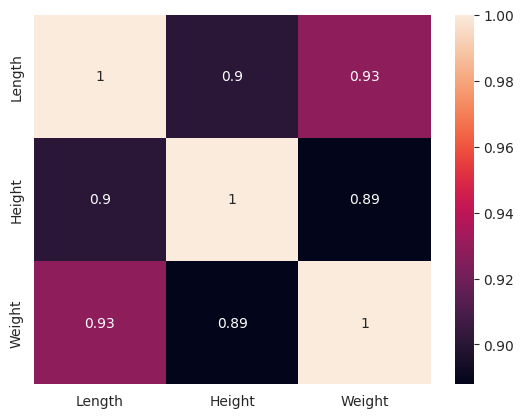

In [337]:
df_corr = df[numerical_columns].corr()
sns.heatmap(df_corr, annot=True)

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X = df.drop('Age', axis=1)
y = df['Age']

In [340]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=0)

In [347]:
categorical_columns = X_train.select_dtypes(exclude='number').columns.tolist()

In [348]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [349]:
numeric_pipeline = Pipeline(steps=[
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [350]:
from sklearn.compose import ColumnTransformer

In [351]:
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_columns),
    ('object', categorical_pipeline, categorical_columns)
])

In [352]:
full_processor.fit_transform(X_train)

array([[0.52027027, 0.56      , 0.17982055, 0.        , 0.        ,
        1.        ],
       [0.64189189, 0.54      , 0.26139901, 0.        , 1.        ,
        0.        ],
       [0.87837838, 0.86      , 0.66581212, 0.        , 0.        ,
        1.        ],
       ...,
       [0.64189189, 0.58      , 0.28438015, 0.        , 1.        ,
        0.        ],
       [0.74324324, 0.7       , 0.40615272, 0.        , 0.        ,
        1.        ],
       [0.2972973 , 0.34      , 0.04495514, 0.        , 1.        ,
        0.        ]])

In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [390]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [391]:
LR = LinearRegression()

In [392]:
KNR = KNeighborsRegressor()

In [393]:
DTR = DecisionTreeRegressor()

In [394]:
def model_pipeline(model):

    pipeline = Pipeline(steps=[
        ('preprocess', full_processor),
        ('model', model)
    ])
    model_fit = pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_valid)
    MAE = mean_absolute_error(y_valid, preds)
    MSE = mean_squared_error(y_valid, preds)
    RMSE = np.sqrt(MSE)
    return {"model": model, "MAE": MAE, "MSE": MSE, "RMSE": RMSE}

In [395]:
model_pipeline(LR)

{'model': LinearRegression(),
 'MAE': 0.1558205847920375,
 'MSE': 0.040810694589434454,
 'RMSE': 0.2020165700863037}

In [396]:
model_pipeline(KNR)

{'model': KNeighborsRegressor(),
 'MAE': 0.16499391733055932,
 'MSE': 0.04595973306103822,
 'RMSE': 0.2143822125574746}

In [397]:
model_pipeline(DTR)

{'model': DecisionTreeRegressor(),
 'MAE': 0.21994851144822783,
 'MSE': 0.0851869347071394,
 'RMSE': 0.29186800905056276}